In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

rows_to_keep = [5,6]
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## File Prepping

In [44]:
#--- DOH Data ----------------------
sheets_metadata = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 02 Metadata - Sheets.csv')
fields_metadata = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 03 Metadata - Fields.csv')
#cases_b0 = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 04 Case Information_batch_0.csv', low_memory = False)
#cases_b1 = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 04 Case Information_batch_1.csv', low_memory = False)
#cases_b2 = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 04 Case Information_batch_2.csv', low_memory = False)
#cases_b3 = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 04 Case Information_batch_3.csv', low_memory = False)
dailyreport = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 05 DOH Data Collect - Daily Report.csv')
weeklyreport = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 06 DOH Data Collect - Weekly Report.csv')
testing_aggregates = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 07 Testing Aggregates.csv')
baseline = pd.read_csv('DOH_Data_Drop\DOH COVID Data Drop_ 20220326 - 10 DOH Data Collect v8 - Baseline.csv', low_memory = False)


#cases = pd.concat([cases_b1, cases_b2, cases_b3])

# Get only useful data from dailyreport
dailyreport = dailyreport[['reportdate', 'region', 'province', 'city_mun', 'conf_asym', 'conf_mild', 'conf_severe', 'conf_crit', 'conf_mod']]
#------------------------------------

#--- NETLOGO DATA -------------------

# Spread of Disease Data
sodA = pd.read_csv('Test-12\Test 12A - Galvez\Test 12A Galvez - Spread of Disease.csv', skiprows = 19, usecols=[0,1,5,9,13])
sodB = pd.read_csv('Test-12\Test 12B - Galvez\Test 12B Galvez - Spread of Disease.csv', skiprows = 19, usecols=[0,1,5,9,13])
sodC = pd.read_csv('Test-12\Test 12C - Salmingo\Test 12C Salmingo - Spread of Disease.csv', skiprows = 19, usecols=[0,1,5,9,13])

# Renaming SoD to respective column names
sodA.columns = ['days', 'asym', 'moderate', 'severe', 'mild']
sodB.columns = ['days', 'asym', 'moderate', 'severe', 'mild']
sodC.columns = ['days', 'asym', 'moderate', 'severe', 'mild']

# Getting the model parameters
test_modelA = pd.read_csv('Test-12\Test 12A - Galvez\Test 12A Galvez - Spread of Disease.csv', skiprows = lambda x: x not in rows_to_keep)
test_modelB = pd.read_csv('Test-12\Test 12B - Galvez\Test 12B Galvez - Spread of Disease.csv', skiprows = lambda x: x not in rows_to_keep)
test_modelC = pd.read_csv('Test-12\Test 12C - Salmingo\Test 12C Salmingo - Spread of Disease.csv', skiprows = lambda x: x not in rows_to_keep)

# Ticks Represents in minutes
tick_represents = 10
ticks_to_days = int(1440/tick_represents)

sod_days_A = sodA.iloc[1::ticks_to_days, :]
sod_days_B = sodB.iloc[1::ticks_to_days, :]
sod_days_C = sodC.iloc[1::ticks_to_days, :]

In [45]:
# Convert dates from objects/strings to datetime
dailyreport['reportdate'] = pd.to_datetime(dailyreport['reportdate'])
#cases['DateRepConf'] = pd.to_datetime(cases['DateRepConf'])

# Filtering out to only the NCR Region
ncr = dailyreport[dailyreport['region'] == 'NATIONAL CAPITAL REGION (NCR)']

# Filtering out to only Manila City
district_1 = "NCR, CITY OF MANILA, FIRST DISTRICT (NOT A PROVINCE)"
manila = dailyreport[dailyreport['province'] == district_1]

# Filetering out to only Marikina
marikina = dailyreport[dailyreport['city_mun'] == 'CITY OF MARIKINA']
#marikina_cases = cases[cases['CityMunRes'] == 'CITY OF MARIKINA']
#marikina_cases = marikina_cases.reset_index().drop('index', axis=1)

In [46]:
# Averaging out the three SODs
sod = pd.concat((sod_days_A, sod_days_B, sod_days_C))
by_row_index = sod.groupby(sod.index)
sod_means = by_row_index.mean()

In [47]:
test_modelA

,covid-variant,commute-area,mask-wear-faceshield-percent,healthcare-area,leisure-area,essential-worker-count,starting-infected-severe,vax-type,total-population,starting-infected-moderate,grocery-area,comorbidity-count,vax-per-day,pandemic-time,maximum-days,starting-infected-asymp,curfew-hours,workplace-area,tick-represents,starting-infected-mild,starting-vax-percent,healthcare-worker-count,alert-level,mask-wear-percent,senior-count
0,"""Delta""",2940,80,1470,4410,222,1,"""Average""",1012,1,2940,40,1,3,0,1,8,4410,"""10 Minutes""",1,35,111,"""Level 4 & 5""",95,40


## Calculation for Vax
| August 2021 | (Cumulative Vax 1st Dose as of end of Aug 2021 - Cumulative Vax 1st Dose as end of July 2021) / (#of days in between) |

In [6]:
aug_vax = (277879 - 81950) / 30

# Metadata
### What do the headers mean?

Refer to Index [47-69] for the cases 

In [7]:
sheets_metadata;

# Select Pandas dataframe rows between two dates

[Guide](https://www.interviewqs.com/ddi-code-snippets/select-pandas-dataframe-rows-between-two-dates)

In [8]:
start_date = '2021-08-01'
end_date = '2021-12-15'

omicron_start_date = '2021-12-15'
omicron_end_date = '2022-02-18'

In [10]:
marikina_mask = (marikina['reportdate'] >= start_date) & (marikina['reportdate'] <= end_date)

## Marikina

In [41]:
#Scale NetLogo data to fit DOH graph
scale_factor = 1.5

#df = sod_days_A.drop('days', axis=1)
#sod_scaled_A = df * scale_factor
#sod_scaled = pd.concat((sod_scaled, sod_days.days), 1)
df = sod_means.drop('days', axis=1)
sod_scaled = df * scale_factor
sod_scaled = pd.concat((sod_scaled, sod_means.days), 1)

C:\Users\Daft\AppData\Local\Temp\ipykernel_45540\4025308006.py:9: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  sod_scaled = pd.concat((sod_scaled, sod_means.days), 1)


In [37]:
marikina_date = marikina.loc[marikina_mask].groupby([marikina['reportdate'].dt.date]).sum()
#marikina_cases_date = marikina_cases.loc[marikina_cases_mask].reset_index()

#marikina_cases_date = marikina_cases_date.drop('index', axis=1)

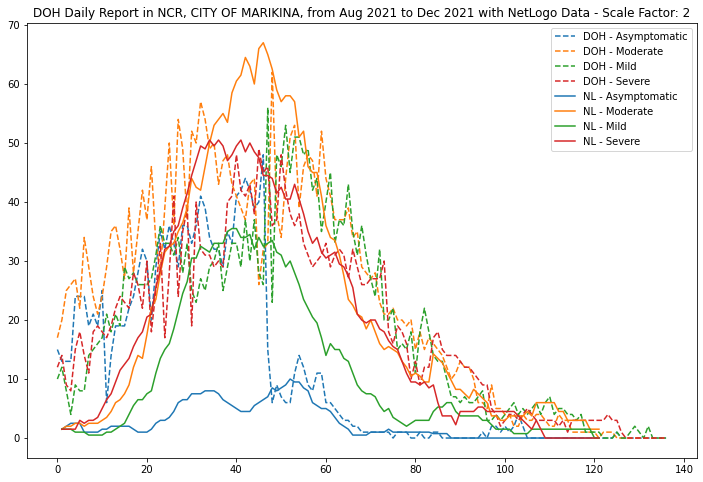

In [42]:
plt.figure(figsize=(12,8))
plt.plot(marikina_date.reset_index().index, marikina_date.conf_asym, '--', color="tab:blue")
plt.plot(marikina_date.reset_index().index, marikina_date.conf_mod,  '--', color="tab:orange")
plt.plot(marikina_date.reset_index().index, marikina_date.conf_mild, '--', color="tab:green")
plt.plot(marikina_date.reset_index().index, marikina_date.conf_severe, '--', color="tab:red")

plt.plot(sod_scaled.days, sod_scaled.asym, color="tab:blue")
plt.plot(sod_scaled.days, sod_scaled.moderate, color="tab:orange")
plt.plot(sod_scaled.days, sod_scaled.mild, color="tab:green")
plt.plot(sod_scaled.days, sod_scaled.severe, color="tab:red")


plt.legend(['DOH - Asymptomatic', 'DOH - Moderate', 'DOH - Mild', 'DOH - Severe',
            'NL - Asymptomatic', 'NL - Moderate', 'NL - Mild', 'NL - Severe'])
plt.title('DOH Daily Report in NCR, CITY OF MARIKINA, from Aug 2021 to Dec 2021 with NetLogo Data - Scale Factor: 2')
plt.show()

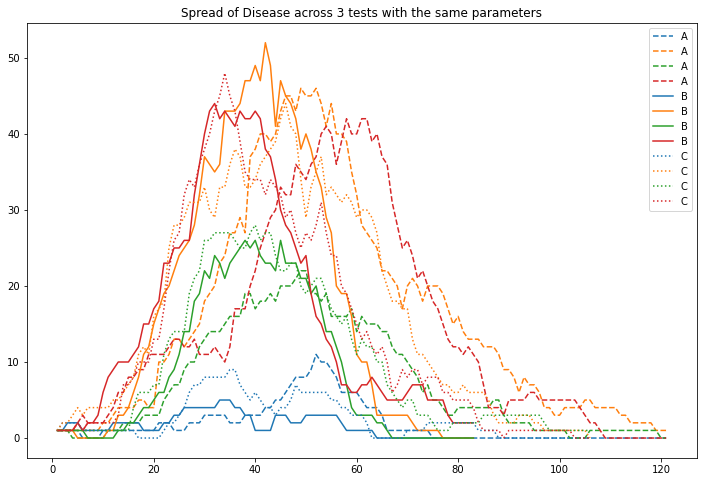

In [32]:
plt.figure(figsize=(12,8))

plt.plot(sod_days_A.days, sod_days_A.asym, '--', color="tab:blue")
plt.plot(sod_days_A.days, sod_days_A.moderate, '--', color="tab:orange")
plt.plot(sod_days_A.days, sod_days_A.mild, '--', color="tab:green")
plt.plot(sod_days_A.days, sod_days_A.severe, '--', color="tab:red")

plt.plot(sod_days_B.days, sod_days_B.asym, color="tab:blue")
plt.plot(sod_days_B.days, sod_days_B.moderate, color="tab:orange")
plt.plot(sod_days_B.days, sod_days_B.mild, color="tab:green")
plt.plot(sod_days_B.days, sod_days_B.severe, color="tab:red")

plt.plot(sod_days_C.days, sod_days_C.asym, ':', color="tab:blue")
plt.plot(sod_days_C.days, sod_days_C.moderate, ':', color="tab:orange")
plt.plot(sod_days_C.days, sod_days_C.mild, ':', color="tab:green")
plt.plot(sod_days_C.days, sod_days_C.severe, ':', color="tab:red")

plt.title('Spread of Disease across 3 tests with the same parameters')
plt.legend(['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', ])




In [87]:
sod_days_A.max()

days        121
asym         11
moderate     46
severe       42
mild         22
dtype: int64

In [88]:
sod_days_C.max()

days        106
asym          9
moderate     44
severe       48
mild         28
dtype: int64

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(marikina_date.reset_index().index, marikina_date.conf_asym, '--', color="tab:blue")
plt.plot(marikina_date.reset_index().index, marikina_date.conf_mod,  '--', color="tab:orange")
plt.plot(marikina_date.reset_index().index, marikina_date.conf_mild, '--', color="tab:green")
plt.plot(marikina_date.reset_index().index, marikina_date.conf_severe, '--', color="tab:red")

plt.plot(sod_days_C.days, sod_days_C.asym, '--', color="tab:blue")
plt.plot(sod_days_C.days, sod_days_C.moderate, '--', color="tab:orange")
plt.plot(sod_days_C.days, sod_days_C.mild, '--', color="tab:green")
plt.plot(sod_days_C.days, sod_days_C.severe, '--', color="tab:red")


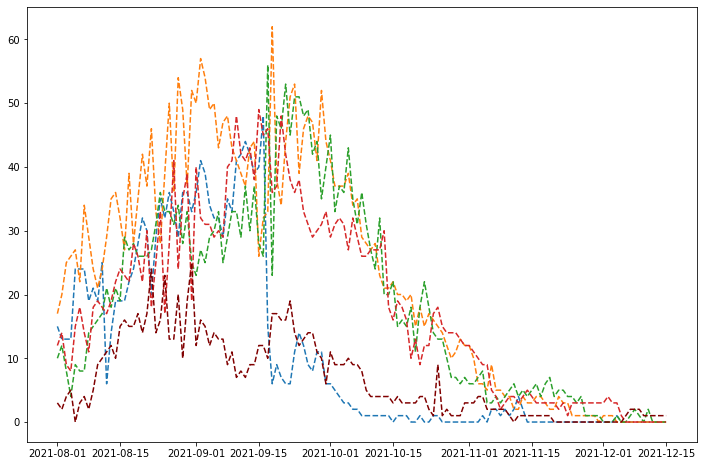

In [25]:
plt.figure(figsize=(12,8))
plt.plot(marikina_date.index, marikina_date.conf_asym, '--', color="tab:blue")
plt.plot(marikina_date.index, marikina_date.conf_mod,  '--', color="tab:orange")
plt.plot(marikina_date.index, marikina_date.conf_mild, '--', color="tab:green")
plt.plot(marikina_date.index, marikina_date.conf_severe, '--', color="tab:red")
plt.plot(marikina_date.index, marikina_date.conf_crit, '--', color="maroon")

In [30]:
marikina_date.reset_index()

,reportdate,conf_asym,conf_mild,conf_severe,conf_crit,conf_mod
0,2021-08-01,15.0,10.0,12.0,3.0,17.0
1,2021-08-02,13.0,12.0,14.0,2.0,20.0
2,2021-08-03,13.0,8.0,9.0,4.0,25.0
3,2021-08-04,13.0,4.0,8.0,5.0,26.0
4,2021-08-05,24.0,9.0,15.0,0.0,27.0
5,2021-08-06,24.0,8.0,18.0,3.0,22.0
6,2021-08-07,24.0,8.0,14.0,4.0,34.0
7,2021-08-08,19.0,14.0,11.0,2.0,29.0
8,2021-08-09,21.0,15.0,18.0,5.0,24.0
9,2021-08-10,19.0,16.0,19.0,9.0,21.0


In [28]:
marikina_date

,conf_asym,conf_mild,conf_severe,conf_crit,conf_mod
reportdate,,,,,
2021-08-01,15.0,10.0,12.0,3.0,17.0
2021-08-02,13.0,12.0,14.0,2.0,20.0
2021-08-03,13.0,8.0,9.0,4.0,25.0
2021-08-04,13.0,4.0,8.0,5.0,26.0
2021-08-05,24.0,9.0,15.0,0.0,27.0
2021-08-06,24.0,8.0,18.0,3.0,22.0
2021-08-07,24.0,8.0,14.0,4.0,34.0
2021-08-08,19.0,14.0,11.0,2.0,29.0
2021-08-09,21.0,15.0,18.0,5.0,24.0
